# Simple RNN for IMDB

In [2]:
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Embedding, SimpleRNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import Dense

### Parameters Setting

In [3]:
max_features = 10000  # 특성으로 사용할 단어의 수
maxlen = 500  # 사용할 텍스트의 길이(가장 빈번한 max_features 개의 단어만 사용합니다)
batch_size = 32

### Step 1. Data

In [4]:
print('데이터 로딩...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), '훈련 시퀀스')
print(len(x_test), '테스트 시퀀스')

print('시퀀스 패딩 (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('input_train 크기:', x_train.shape)
print('input_test 크기:', x_test.shape)

데이터 로딩...
17465344/17464789 [==============================] - 5s 0us/step
25000 훈련 시퀀스
25000 테스트 시퀀스
시퀀스 패딩 (samples x time)
input_train 크기: (25000, 500)
input_test 크기: (25000, 500)


### Step 2. RNN Model

In [5]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


### Step 3. Loss,Optimizer, Metric

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

### Step 4. Train the model

In [0]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128,
                    verbose=2, validation_split=0.2)

W0723 11:34:50.078574 140190010161024 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 - 144s - loss: 0.5711 - acc: 0.6823 - val_loss: 0.5226 - val_acc: 0.7350
Epoch 2/10
20000/20000 - 151s - loss: 0.3631 - acc: 0.8475 - val_loss: 0.4150 - val_acc: 0.8442
Epoch 3/10
20000/20000 - 149s - loss: 0.2808 - acc: 0.8872 - val_loss: 0.3497 - val_acc: 0.8608
Epoch 4/10
20000/20000 - 137s - loss: 0.2228 - acc: 0.9172 - val_loss: 0.3706 - val_acc: 0.8406
Epoch 5/10
20000/20000 - 137s - loss: 0.1857 - acc: 0.9318 - val_loss: 0.3847 - val_acc: 0.8354
Epoch 6/10
20000/20000 - 136s - loss: 0.1387 - acc: 0.9512 - val_loss: 0.3831 - val_acc: 0.8588
Epoch 7/10
20000/20000 - 135s - loss: 0.0929 - acc: 0.9689 - val_loss: 0.4281 - val_acc: 0.8630
Epoch 8/10
20000/20000 - 136s - loss: 0.0637 - acc: 0.9805 - val_loss: 0.5262 - val_acc: 0.8630
Epoch 9/10
20000/20000 - 136s - loss: 0.0414 - acc: 0.9873 - val_loss: 0.4951 - val_acc: 0.8444
Epoch 10/10
20000/20000 - 136s - loss: 0.0484 - acc: 0.9862 - val_loss: 0.5518 - val_ac

### Step 5. Test the Model

In [0]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('test_loss = ',test_loss, 'test_acc = ',test_acc)

25000/25000 [==============================] - 168s 7ms/sample - loss: 0.5740 - acc: 0.8388
test_loss =  0.5739502579116821 test_acc =  0.83884


### Plot the Training/Validation Accuracy and Loss

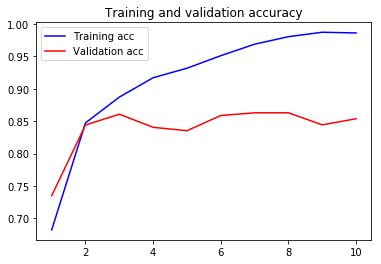

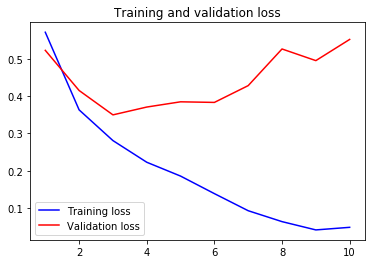

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()